# UKB24983 v2 release (488k dataset) marker QC. 

## Yosuke Tanigawa (ytanigaw@stanford.edu) on 2017/7/25

## Guhan Venkataraman (guhan@stanford.edu) on 2018/11/2

In [1]:
%matplotlib inline

from __future__ import print_function
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools as it
import collections as cl

# Some plot options
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
def check_df(df):
    """Show the shape and first 5 entries of a given pandas data frame"""
    print('Dataframe shape: {}'.format(df.shape))
    return df.head()

### BioBank's Marker QC detail 
Please take the time to read http://biobank.ndph.ox.ac.uk/showcase/refer.cgi?id=531 in order to get an appreciation for what kinds of metrics BioBank has annotated the files with.

In [3]:
# Marker QC file location has been updated to be in the OAK space now
snp_f = '/oak/stanford/groups/mrivas/ukbb24983/snp/snp_download/ukb_snp_qc.txt'

In [4]:
snp_df = pd.read_csv(snp_f, sep='\s+')

### Subset to autosomes

For the purposes of plotting the quality metrics, we want to subset to the autosomal chromosomes. We can get an idea of how many SNPs are in each chromosome below using the built in Collections.Counter() function:

In [5]:
cl.Counter(snp_df.chromosome)

Counter({1: 63487,
         2: 61966,
         3: 52300,
         4: 47443,
         5: 46314,
         6: 53695,
         7: 42722,
         8: 38591,
         9: 34310,
         10: 38308,
         11: 40824,
         12: 37302,
         13: 26806,
         14: 25509,
         15: 24467,
         16: 28960,
         17: 28835,
         18: 21962,
         19: 26186,
         20: 19959,
         21: 11342,
         22: 12968,
         23: 18857,
         24: 691,
         25: 1357,
         26: 265})

In [6]:
# The following command subsets the dataframe to only those variants that are in the autosome
snp_auto_df = snp_df[snp_df.chromosome < 23]

In [7]:
check_df(snp_auto_df)

Dataframe shape: (784256, 159)


rs_id affymetrix_snp_id affymetrix_probeset_id  chromosome  position  \
0   rs28659788     Affx-13546538            AX-32115783           1    723307   
1  rs116587930     Affx-35298040            AX-37361813           1    727841   
2  rs116720794     Affx-13637449            AX-32137419           1    729632   
3    rs3131972     Affx-13945728            AX-13191280           1    752721   
4   rs12184325     Affx-13963217            AX-11194291           1    754105   

  allele1_ref allele2_alt strand  array  Batch_b001_qc        ...         \
0           C           G      +      0              1        ...          
1           G           A      +      2              1        ...          
2           C           T      +      2              1        ...          
3           A           G      +      2              1        ...          
4           C           T      +      2              1        ...          

   PC32_loading  PC33_loading  PC34_loading  PC35_loading  PC36_loading  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4     -0.003471      0.005899     -0.003739     -0.001896     -0.002869   

   PC37_loading  PC38_loading  PC9_loading.3  PC40_loading  in_Phasing_Input  
0           NaN           NaN            NaN           NaN                 0  
1           NaN           NaN            NaN           NaN                 0  
2           NaN           NaN            NaN           NaN                 0  
3           NaN           NaN            NaN           NaN                 1  
4      0.000792      -0.00191       0.003075     -0.000411                 1  

[5 rows x 159 columns]

### Array types
A small amount of the UK BioBank data was recorded on the UKBiLEVE Axiom array as opposed to the UKBB Axiom array (which was designed in time for the flagship BioBank paper (Bycroft, et. al.)). The following code determines how much data is of each type.

Whether the entire sample (as in, all variants) are in each dataset is also recorded (`is_all_in_UKBB`, `is_all_in_UKBiLEVE`).

In [8]:
Batch_UKBB = [x for x in snp_df.columns if x[:6] == 'Batch_']
Batch_UKBiLEVE = [x for x in snp_df.columns if x[:11] == 'UKBiLEVEAX_']

In [9]:
is_in_UKBiLEVE = snp_auto_df[Batch_UKBiLEVE[0]] > 0
for i in range(1, len(Batch_UKBiLEVE)):
    is_in_UKBiLEVE = is_in_UKBiLEVE | (snp_auto_df[Batch_UKBiLEVE[i]] > 0)

In [10]:
cl.Counter(is_in_UKBiLEVE)

Counter({False: 442, True: 783814})

In [11]:
is_in_UKBB = snp_auto_df[Batch_UKBB[0]] > 0
for i in range(1, len(Batch_UKBB)):
    is_in_UKBB = is_in_UKBB | (snp_auto_df[Batch_UKBB[i]] > 0)

In [12]:
cl.Counter(is_in_UKBB)

Counter({True: 784256})

In [13]:
is_all_in_UKBiLEVE = snp_auto_df[Batch_UKBiLEVE[0]] > 0
for i in range(1, len(Batch_UKBiLEVE)):
    is_all_in_UKBiLEVE = is_all_in_UKBiLEVE & (snp_auto_df[Batch_UKBiLEVE[i]] > 0)

In [14]:
cl.Counter(is_all_in_UKBiLEVE)

Counter({False: 12014, True: 772242})

In [15]:
is_all_in_UKBB = snp_auto_df[Batch_UKBB[0]] > 0
for i in range(1, len(Batch_UKBB)):
    is_all_in_UKBB = is_all_in_UKBB & (snp_auto_df[Batch_UKBB[i]] > 0)

In [16]:
cl.Counter(is_all_in_UKBB)

Counter({False: 43349, True: 740907})

## Plots of QC pass rate for each batch

In [17]:
Batch_UKBB_pass_QC_rate_per_batch = [
    np.sum(snp_auto_df[Batch_UKBB[i]] > 0) / len(snp_auto_df)
    for i in range(len(Batch_UKBB))
]
Batch_UKBiLEVE_pass_QC_rate_per_batch = [
    np.sum(snp_auto_df[Batch_UKBiLEVE[i]] > 0) / len(snp_auto_df) 
    for i in range(len(Batch_UKBiLEVE))
]

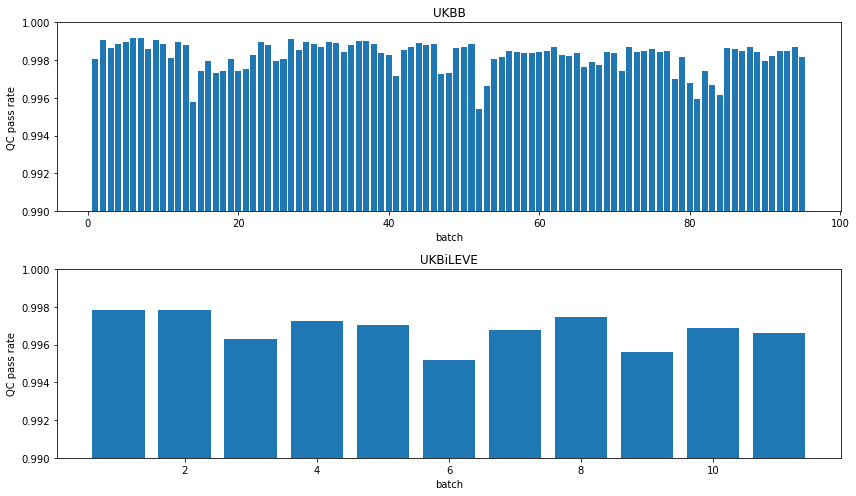

In [18]:
fig = plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(2, 1)
axs = [fig.add_subplot(ss) for ss in gs]
axs[0].bar(range(1, len(Batch_UKBB_pass_QC_rate_per_batch) + 1), 
            Batch_UKBB_pass_QC_rate_per_batch)
axs[1].bar(range(1, len(Batch_UKBiLEVE_pass_QC_rate_per_batch) + 1), 
            Batch_UKBiLEVE_pass_QC_rate_per_batch)
for ax in axs:
    ax.set_ylim([0.99, 1])
    ax.set_ylabel('QC pass rate')
    ax.set_xlabel('batch')
axs[0].set_title('UKBB')
axs[1].set_title('UKBiLEVE')
# fig.suptitle('')
gs.tight_layout(fig, rect=[0, 0, 1, 1])
# fig.savefig('./fig.png')

As we can see, the pass rate is between 0.995 and 1 per each batch, which is a good thing.